In [1]:
import os
os.chdir('../')

import numpy as np 
import pandas as pd
import time
import pmdarima as pm

import data
import sarima
import arima
import utils


In [74]:
import matplotlib.pyplot as plt

In [6]:
directory = 'output/arima'
data_directory = 'data'
aggregation = 'day'
overwrite = True
limit = 1
station = '(07002) madelena'
arima_models = arima.arimaClass(directory, data_directory, aggregation)

In [7]:
arima_models.fit_arima(station)

INFO:root:Model for station (07002) madelena compleated. Time 0.43 minutes


In [8]:
prediction, ape = arima_models.predict(station)

In [51]:
out_folder = os.path.join(directory, 'results', aggregation)
estimated_stations = os.listdir(out_folder)
paths = [os.path.join(out_folder, path) for path in estimated_stations]

In [105]:
df = arima_models.test
dates = pd.to_datetime(df[['year', 'month', 'day']])

In [106]:
apes = []
stations = []
for path in paths:
    station = path[:-5].split('/')[-1]
    results = utils.read_json(path)
    prediction = np.array(results['prediction'])[:-1,1]
    target = arima_models.test[station][:-1]
    ape = np.abs((target - prediction)/target)
    apes.append(ape)
    stations.append(station)


In [117]:
results = pd.DataFrame( data = np.array(apes).T, columns= stations, index = dates[:-1])

DatetimeIndex(['2018-08-01', '2018-08-02', '2018-08-03', '2018-08-04',
               '2018-08-05', '2018-08-06', '2018-08-07', '2018-08-08',
               '2018-08-09', '2018-08-10',
               ...
               '2021-04-21', '2021-04-22', '2021-04-23', '2021-04-24',
               '2021-04-25', '2021-04-26', '2021-04-27', '2021-04-28',
               '2021-04-29', '2021-04-30'],
              dtype='datetime64[ns]', length=1004, freq=None)

In [123]:
pre_mape = results.loc[:'2020-03-17',:].mean(axis = 0)
pos_mape = results.loc['2020-03-17':,:].mean(axis = 0)

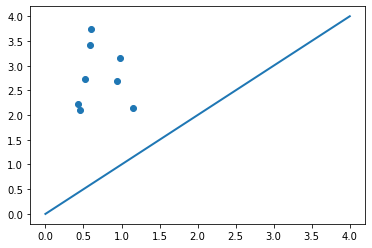

In [126]:
plt.scatter(pre_mape, pos_mape)
plt.plot([0, 4], [0, 4], linewidth=2)

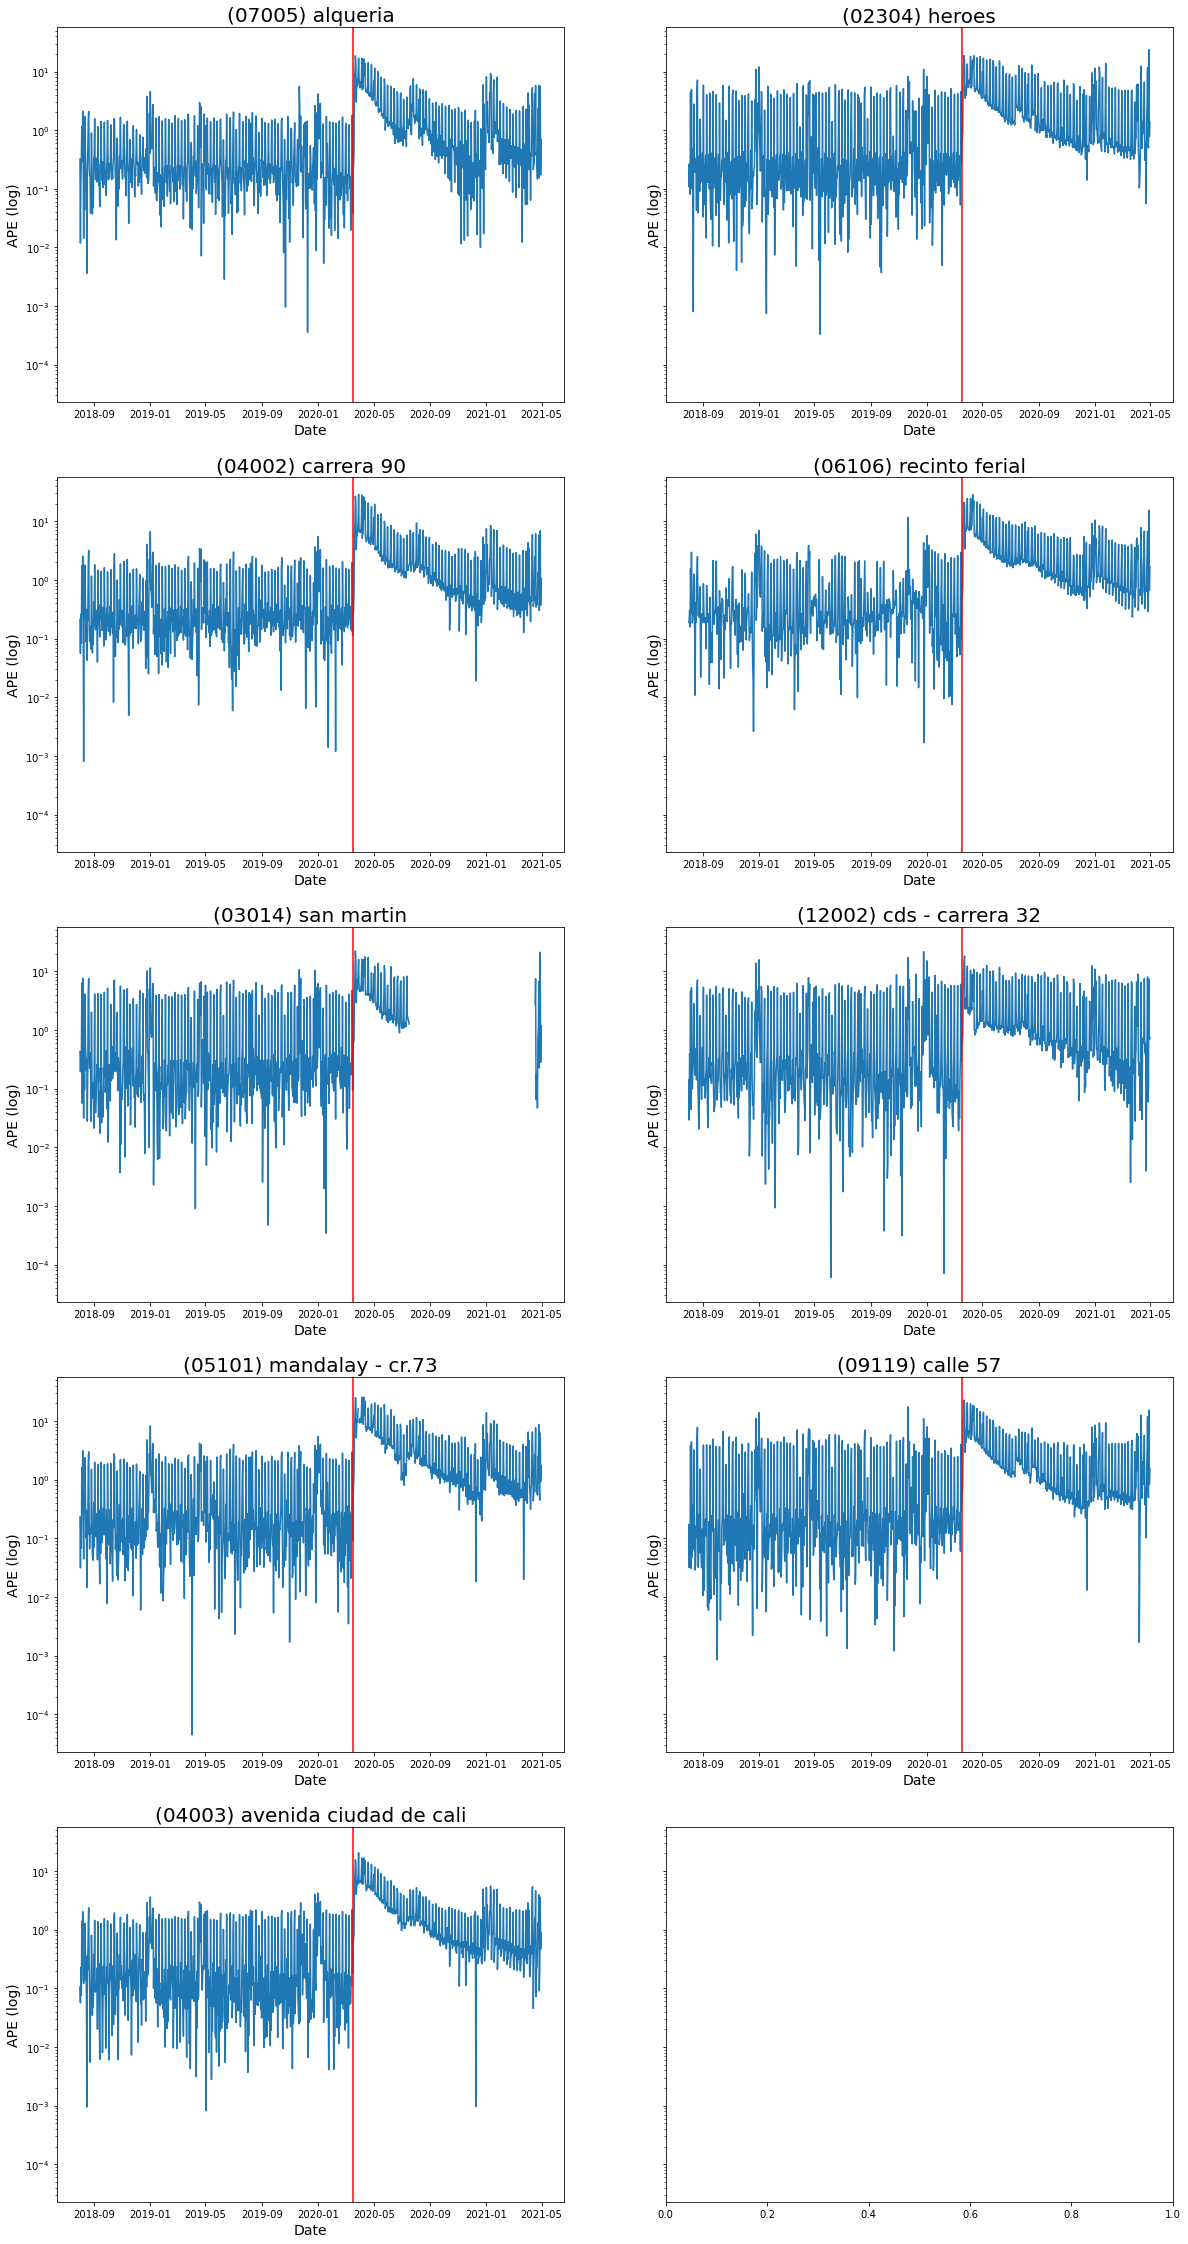

In [116]:


rows = range(5)
cols = range(2)
counter = 0
fig, axs = plt.subplots(5,2, figsize = (20,40), sharey = True)
for row in rows: 
    for col in cols:
        station = results.columns[counter]
        axs[row][col].plot(results[results<30][station])
        axs[row][col].set_title(station, fontsize=20)
        axs[row][col].set_yscale('log')
        axs[row][col].set_ylabel('APE (log)',fontsize=14)
        axs[row][col].set_xlabel('Date', fontsize=14)
        axs[row][col].axvline('2020-03-17', color = 'red')
        counter += 1
        if counter == len(results.columns):
            break
